In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon_df = pd.read_csv('./pokemon.csv')
pokemon_df.head(2)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


In [3]:
pokemon_types = pokemon_df.melt(id_vars = ['generation_id'], value_vars = ['type_1', 'type_2'],
                               var_name = 'type_level', value_name = 'type').dropna()
# Note :: Uncomment below statement to observe result
# pokemon_types[802:812]

In [4]:
type_counts = pokemon_types['type'].value_counts()
# Note :: Uncomment below statement to observe result
# type_counts

In [5]:
type_order = type_counts.index
# Note :: Uncomment below statement to observe result
# type_order

In [6]:
base_color = sb.color_palette()[0]
# Note :: Uncomment below statement to observe result
# sb.countplot(data = pokemon_types, y = 'type', color = base_color, order = type_order)

In [7]:
n_pokemon = pokemon_df.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


([<matplotlib.axis.XTick at 0xa4b9ba8>,
 <a list of 9 Text xticklabel objects>)

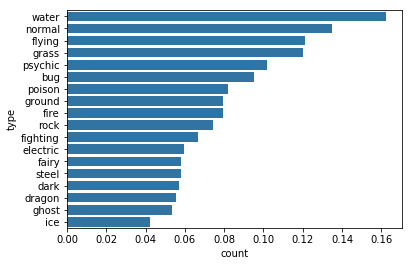

In [8]:
tick_props = np.arange(0, max_prop, 0.02)
# tick_props
tick_names = [ '{:0.2f}'.format(proportion) for proportion in tick_props]
print(tick_names)
sb.countplot(data = pokemon_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)